<a href="https://colab.research.google.com/github/y93r/ImersaoPython_Analise_de_Dados/blob/main/Previs%C3%A3o_de_S%C3%A9ries_Temporais_de_A%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Carregar os dados**

In [27]:
#Bibliotecas
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet

In [28]:
#Baixar dados dos últimos quatro anos das ações da Microsoft
dados = yf.download("MSFT", start="2020-01-01", end="2024-03-29")
dados = dados.reset_index()

[*********************100%%**********************]  1 of 1 completed


In [29]:
dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,158.779999,160.729996,158.330002,160.619995,154.493851,22622100
1,2020-01-03,158.320007,159.949997,158.059998,158.619995,152.570114,21116200
2,2020-01-06,157.080002,159.100006,156.509995,159.029999,152.964478,20813700
3,2020-01-07,159.320007,159.669998,157.320007,157.580002,151.569778,21634100
4,2020-01-08,158.929993,160.800003,157.949997,160.089996,153.984024,27746500
...,...,...,...,...,...,...,...
1062,2024-03-22,429.700012,429.859985,426.070007,428.739990,428.739990,17636500
1063,2024-03-25,425.239990,427.410004,421.609985,422.859985,422.859985,18060500
1064,2024-03-26,425.609985,425.989990,421.350006,421.649994,421.649994,16725600
1065,2024-03-27,424.440002,424.450012,419.010010,421.429993,421.429993,16705000


# **Treinamento do Modelo**

In [30]:
#Dvidir os dados em treino (até o final de 2023) e teste (começo de 2024)
dados_treino = dados[dados['Date'] < '2023-12-31']
dados_teste = dados[dados['Date'] >= '2024-01-01']

In [31]:
#Preparando os dados para o FBProphet
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# **Pârametros**

*yearly_seasonality*: A sazonalidade anual considera padrões que se repetem a cada ano nos dados. <br>
O mesmo vale para *weekly_seasonality* (semanalmente) e *daily_seasonality* (diariamente).  
<br>
*modelo.add_country_holidays(country_name='US')*: Acrescentar os feriados dos EUA como sazonalidade.


In [32]:
#Criar e treinar o modelo
modelo = Prophet(yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=True)

modelo.add_country_holidays(country_name='US')

modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpdj0ds4id/eyz6qwkh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdj0ds4id/ignlbi1l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61642', 'data', 'file=/tmp/tmpdj0ds4id/eyz6qwkh.json', 'init=/tmp/tmpdj0ds4id/ignlbi1l.json', 'output', 'file=/tmp/tmpdj0ds4id/prophet_modelljqi6kj7/prophet_model-20240329204205.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:42:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:42:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [33]:
#Criar datas futuras para previsão o 1º trimestre de 2024
futuro = modelo.make_future_dataframe(periods=90)
previsao = modelo.predict(futuro)

# **Gráfico**

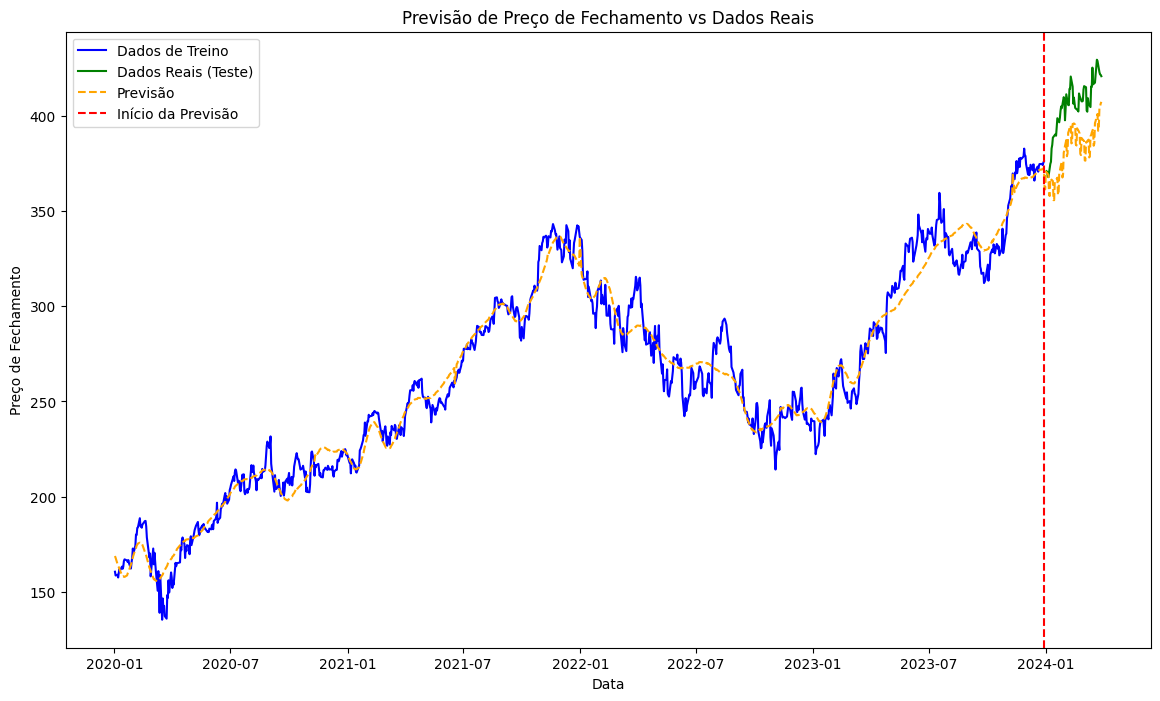

In [34]:
# Plotar os dados de treino, teste e previsões
plt.figure(figsize=(14, 8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()

# **Nova Previsão**

In [35]:
#Criar datas futuras para previsão do 2º trimestre de 2024
futuro = modelo.make_future_dataframe(periods=180)
previsao = modelo.predict(futuro)

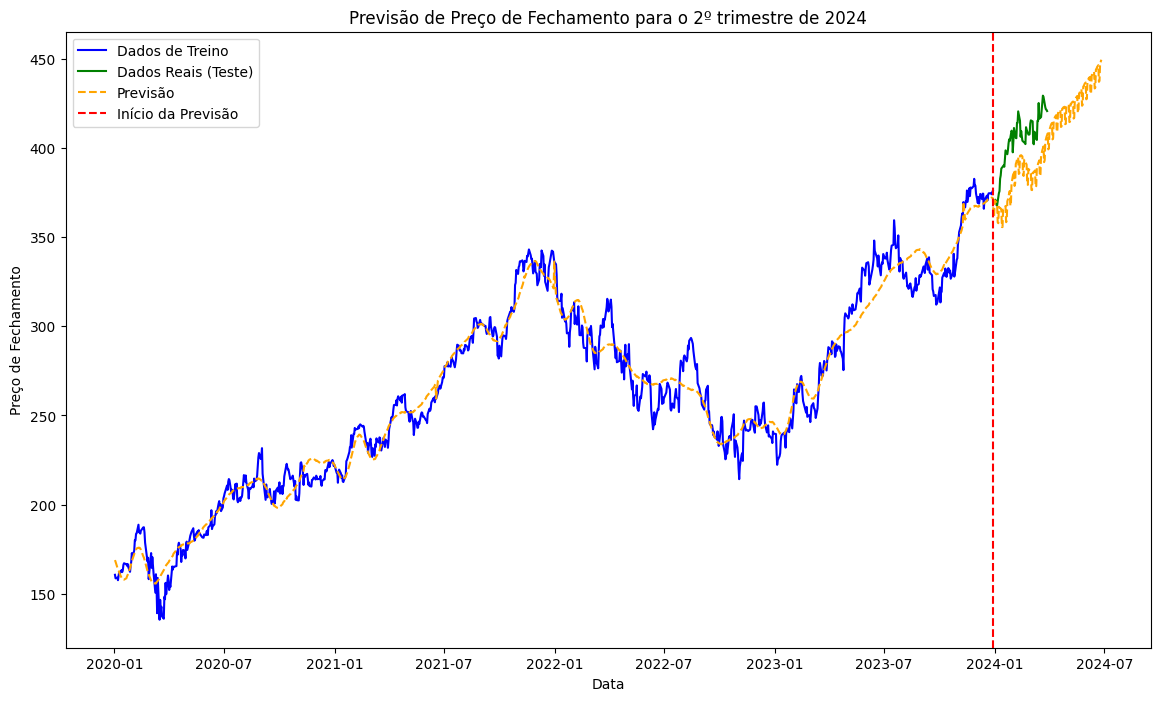

In [37]:
#Plotar os dados de treino, teste e previsões
plt.figure(figsize=(14, 8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento para o 2º trimestre de 2024')
plt.legend()
plt.show()